In [1]:
#Simple Linear Regression Model

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import data set

In [5]:
df = pd.read_csv("california_housing_train.csv")

In [6]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [7]:
pop=df["population"]
bedrooms=df["total_bedrooms"]
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

Text(0, 0.5, 'Total Bedrooms')

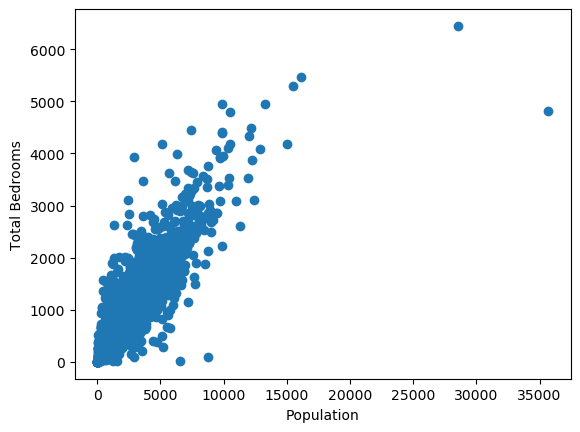

In [8]:
plt.show()

In [11]:
pop_np= pop.to_numpy()
bedrooms_np= bedrooms.to_numpy()
pop_np.shape

(17000,)

In [14]:
bedrooms_np.shape

(17000,)

In [15]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(pop_np.reshape((17000,1)),bedrooms_np)
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000,1)))
sklearn_bedroom_predictions.shape

(17000,)

In [17]:
pop=df["population"]
bedrooms=df["total_bedrooms"]
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.scatter(pop, sklearn_bedroom_predictions)

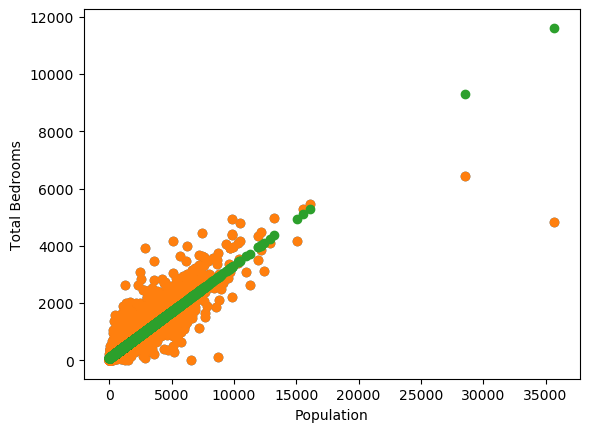

In [18]:
plt.show()

In [20]:
predictions_df = pd.DataFrame({
    'Population':pop,
    'Bedrooms':bedrooms,
    'sklearn Bedroom P':sklearn_bedroom_predictions
})

In [21]:
predictions_df

,Population,Bedrooms,sklearn Bedroom P
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


In [24]:
#Assuming total_bedrooms[i] = alpha + (beta * population[i])+error
#y[i] = alpha + (beta*x[i]) +error
#Model=alpha_hat + (beta_hat*x[i]) 

In [30]:
def get_predictions(model,x):
    alpha_hat=model['alpha_hat']
    beta_hat=model['beta_hat']
    
    return alpha_hat+beta_hat*x

In [37]:
#Testing get_predictions
test_model={'alpha_hat':0.5,'beta_hat':0.5}
test_x = np.array([1,4,3])
get_predictions(test_model, test_x)

array([1. , 2.5, 2. ])

In [38]:
pop=df["population"]
bedrooms=df["total_bedrooms"]
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.scatter(pop, get_predictions(test_model,pop_np))

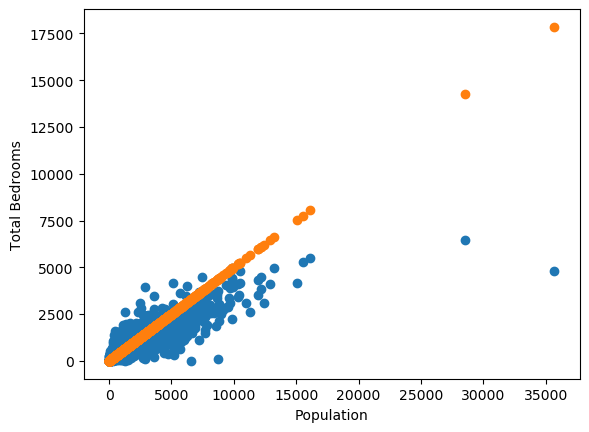

In [39]:
plt.show()

In [41]:
def mean_squared_error(y,y_predictions):
    return np.sum(np.square(y-y_predictions))/len(y)
def mean_absolute_error(y,y_predictions):
    return np.sum(np.abs(y-y_predictions))/len(y)

In [43]:
mse1= mean_squared_error(get_predictions(test_model,pop_np),bedrooms)

In [44]:
mse1

111654.61751470588

In [45]:
mae1 =mean_absolute_error(get_predictions(test_model,pop_np),bedrooms)

In [46]:
mae1

213.0985588235294

In [48]:
def get_best_model(x,y):
    x_bar=np.average(x)
    y_bar=np.average(y)
    
    top = np.sum((x - x_bar)*(y-y_bar))
    bot = np.sum((x-x_bar)**2)
    beta_hat=top/bot
    alpha_hat=y_bar-x_bar*beta_hat
    
    model={'alpha_hat':alpha_hat,'beta_hat':beta_hat}
    return model

In [51]:
best_model= get_best_model(pop_np,bedrooms_np)
best_model

{'alpha_hat': 76.84197820308827, 'beta_hat': 0.32357112283793565}

In [52]:
pop=df["population"]
bedrooms=df["total_bedrooms"]
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.scatter(pop, get_predictions(best_model,pop_np))

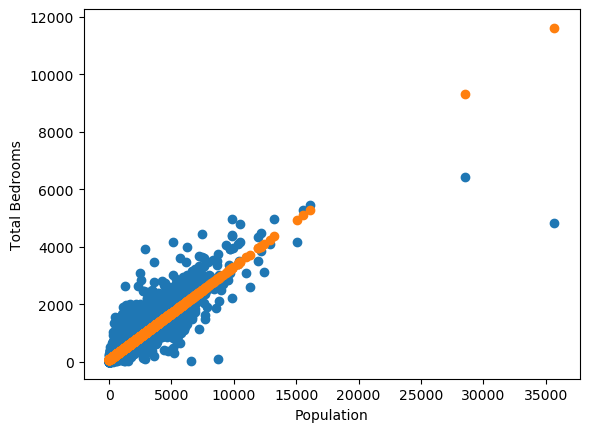

In [53]:
plt.show()

In [55]:
predictions_df["Our Model Predictions"]= get_predictions(best_model, pop_np)
predictions_df

,Population,Bedrooms,sklearn Bedroom P,Our Model Predictions
0,1015.0,1283.0,405.266668,405.266668
1,1129.0,1901.0,442.153776,442.153776
2,333.0,174.0,184.591162,184.591162
3,515.0,337.0,243.481106,243.481106
4,624.0,326.0,278.750359,278.750359
...,...,...,...,...
16995,907.0,394.0,370.320987,370.320987
16996,1194.0,528.0,463.185899,463.185899
16997,1244.0,531.0,479.364455,479.364455
16998,1298.0,552.0,496.837296,496.837296
